# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Загрузка данных и изучение общей информации

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

None

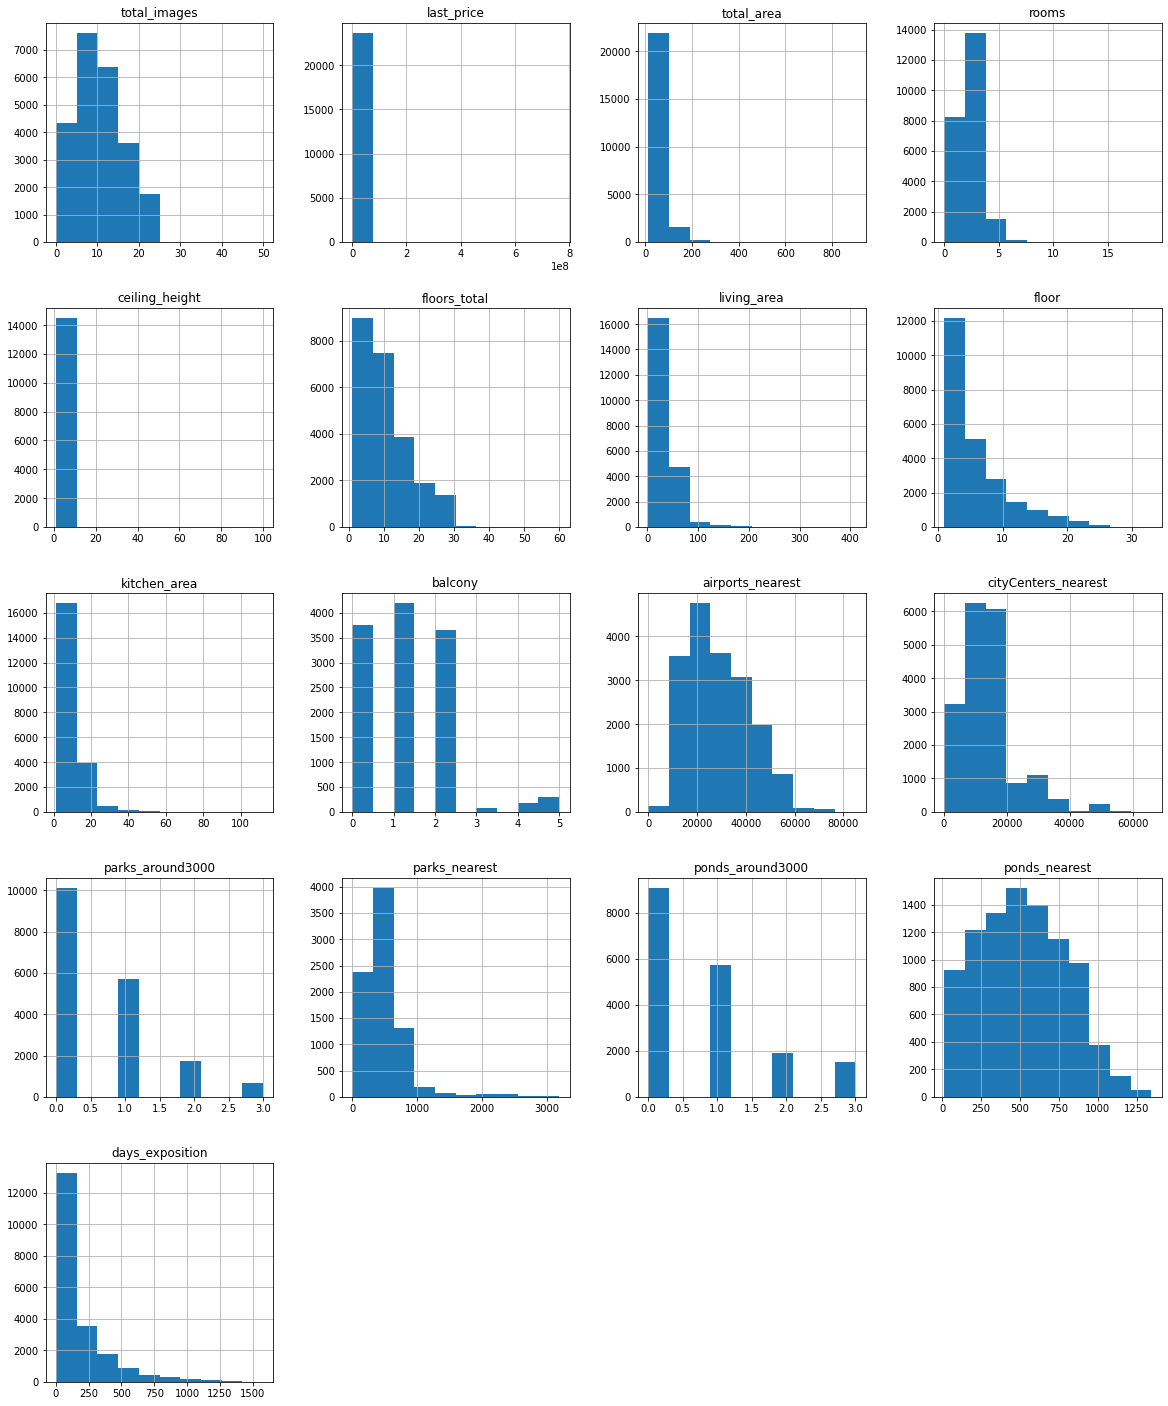

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t' )

display(data.head(10))
data.hist(figsize=(20,25))
display(data.isna().sum(),data.info())#смотрим в каких столбцах есть пропуски




При изучении данных были обнаружены пропущенные значаения
    

### Предобработка данных

<h5> 2.1 Работа с пропусками  <a class="tocSkip"></h5

In [2]:

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())#заполняем пропуски медианым значением

data['balcony'] = data['balcony'].fillna(value='0')#заполняем пропуски 


print(data['is_apartment'].isna().sum())
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].isna().sum())

print(data['living_area'].isna().sum())
data['living_area'] = data['living_area'].fillna((data['total_area']/data['living_area']).median())
print(data['living_area'].isna().sum())


20924
0
1903
0


В столбце 'balcony' были пропущенные значения, скорее всего они появились в последствии воздействия человеческого фактора, так же как и в столбце 'ceiling_height',скорее всего люди просто не знали или же просто не указали.    
    

<h5> 2.2 Переименование столбцов  <a class="tocSkip"></h5
    

In [3]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})
data = data.rename(columns={'parks_around3000' : 'parks_around_3000'})
data = data.rename(columns={'ponds_around3000' : 'ponds_around_3000'})#Переименовываю столбцы
data.columns#Проверяю работу кода

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<h5> 2.3 Работа с типом данных  <a class="tocSkip"></h5
    
    

In [4]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['floors_total'] = data['floors_total'].astype('Int64')
data['balcony'] = data['balcony'].astype('int64')
data['airports_nearest'] = data['airports_nearest'].astype('Int64')
data['city_centers_nearest'] = data['city_centers_nearest'].astype('Int64')
data['parks_around_3000'] = data['parks_around_3000'].astype('Int64')
data['parks_nearest'] = data['parks_nearest'].astype('Int64')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')
data['days_exposition'].astype('Int64',errors='ignore')
data['total_area'] = data['total_area'].astype('int64')
data['last_price'] = data['last_price'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         



В столбце first_day_exposition изменил тип данных, может потребуется в дальнейшем.
В остальных столбцах, по моему мнению более подходит Int64,может потребоваться для улучшения структуры данных, повышения эффективности работы с ними и обеспечения корректности вычислений...    

<h5> 2.4 Работа с дубликатами и уникальными значениями<a class="tocSkip"></h5

In [5]:
print(data['locality_name'].nunique())
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок городского типа', 'коттеджный поселок'], 'поселок', regex=True)
) 
print(data['locality_name'].nunique())

print(data['ceiling_height'].unique())
data['ceiling_height'] = data['ceiling_height'].replace([100,27.5,22.6,20,26,24,27,32,25], [10.0,2.75,2.26,2.0,2.6,2.4,2.7,3.2,2.5])
print(data['ceiling_height'].unique())




364
321
[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22
   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63   3.32
  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04   4.45


### Добавьте в таблицу новые столбцы

In [6]:
data['price_of_one_square_meter'] = data['last_price']/data['total_area']
data['price_of_one_square_meter'] = data['price_of_one_square_meter'].astype('int64')
data['day_weekday'] = data['first_day_exposition'].dt.weekday
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['floors_total'] = data['floors_total'].fillna(value=0)
def floor_defenition(data):
    if data['floor'] == 1:
        return 'первый'
    elif (data['floors_total']==data['floor']) & (data['floor'] != 1):
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(floor_defenition, axis=1) 

data['city_center_distance_km'] = data['city_centers_nearest']/1000

print(data.head())
print(data.describe())


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108           2019-03-07      3   
1             7     3350000          40           2018-12-04      1   
2            10     5196000          56           2015-08-20      2   
3             0    64900000         159           2015-07-24      3   
4             2    10000000         100           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16    51.000000      8         False  ...   
1            2.65            11    18.600000      1         False  ...   
2            2.65             5    34.300000      4         False  ...   
3            2.65            14     1.760998      9         False  ...   
4            3.03            14    32.000000     13         False  ...   

   parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
0            482                  2            755       

### Исследовательский анализ данных

<h5> 4.1 Изучение и описание параметров <a class="tocSkip"></h5

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

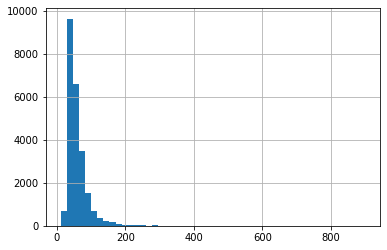

In [7]:
#data.describe()

data['total_area'].hist(bins=50)
data['total_area'].describe()



Наибольшее число обьявлений о продажи квартир  имеют 50 м.кв жилой площади что соответствует 2х комнатной квартире, что похоже на правду.  

count    23699.000000
mean        31.832336
std         22.919921
min          1.760998
25%         17.800000
50%         29.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

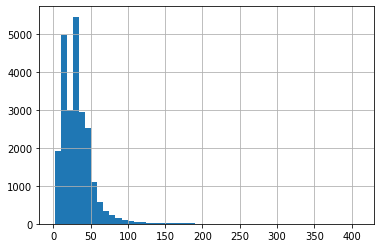

In [8]:
data['living_area'].hist(bins=50)
data['living_area'].describe()



Наибольшее число обьявлений о продажи квартир  имеют 30 м.кв жилой площади что тоже похоже на правду

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

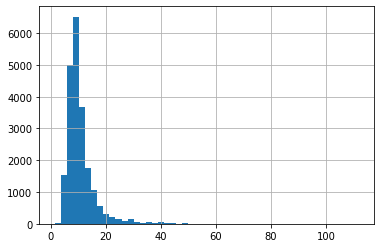

In [9]:
data['kitchen_area'].hist(bins=50)
data['kitchen_area'].describe()



Самая маленькая площадь кухни-3.2кв.м, средняя-9,6кв.м медиана-9кв.м.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

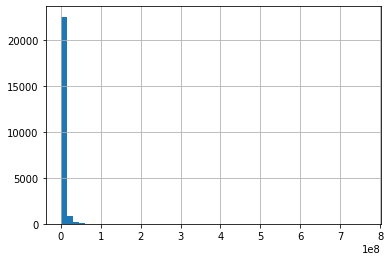

In [10]:
data['last_price'].hist(bins=50)
data['last_price'].describe()



count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

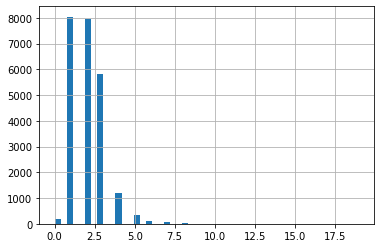

In [11]:
data['rooms'].hist(bins=50)
data['rooms'].describe()


Минимальное кол-во комнат - 1, среднее - 2

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

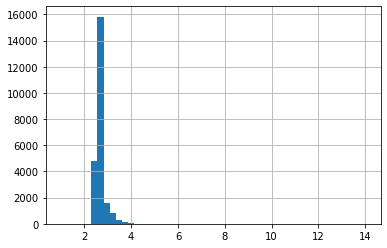

In [12]:
data['ceiling_height'].hist(bins=50)
data['ceiling_height'].describe()


минимальное значение 2м среднее 2,65 ,  скорее всего зависит от времени строительства, в разное время разные стандарты.

count      23699
unique         3
top       другой
freq       17446
Name: floor_category, dtype: object

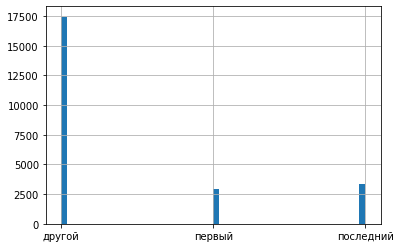

In [13]:
data['floor_category'].hist(bins=50)
data['floor_category'].describe()


нечего добавить, все впорядке

count    23699.000000
mean        10.635090
std          6.616396
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

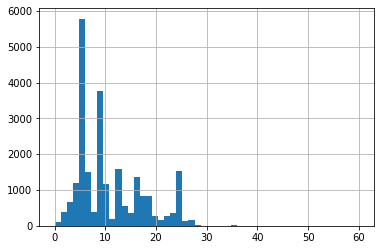

In [14]:
data['floors_total'].hist(bins=50)
data['floors_total'].describe()


Большое количество обычных многоэтажек из спальных районов, все впорядке.

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

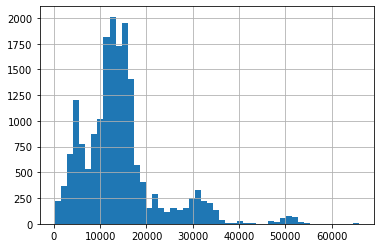

In [15]:
data['city_centers_nearest'].hist(bins=50)
data['city_centers_nearest'].describe()


Большое кол-во обьявлений в 13км от центра, что похоже на правду.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

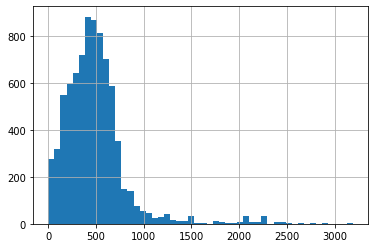

In [16]:
data['parks_nearest'].hist(bins=50)
data['parks_nearest'].describe()


С данными все впорядке.


Данные изучены, аномалий не обнаружены.

<h5> 4.2 Как быстро продавались квартиры<a class="tocSkip"></h5

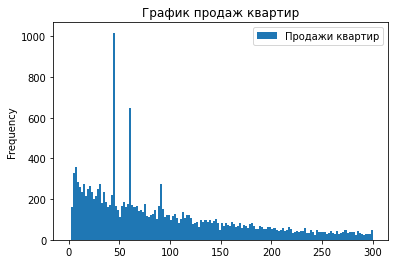

Среднее кол-во дней на сайте 180.88863436982163
Медианое кол-во дней на сайте 95.0


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [17]:
data['days_exposition'].plot(bins=150, kind='hist', range=(0,300), label='Продажи квартир', legend=True, title='График продаж квартир')
plt.show()

print('Среднее кол-во дней на сайте', data['days_exposition'].mean())
print('Медианое кол-во дней на сайте', data['days_exposition'].median())
data['days_exposition'].describe()


 Исходя из даных можно предположить что, быстрыми продажами можно считать все что находиться в пределах до первого квартиля( менее 25%),а необычно долгими, за третьим (75% и более).Есть всплески в районе 45 и 60 дней, скорее всего в эти сроки происходит автоматическое снятие объявлений с публикации

<h5> 4.3 Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта<a class="tocSkip"></h5

<h5> Зависимость цены от площади <a class="tocSkip"></h5

<AxesSubplot:title={'center':'График зависимости цены от площади'}, xlabel='площадь', ylabel='цена'>

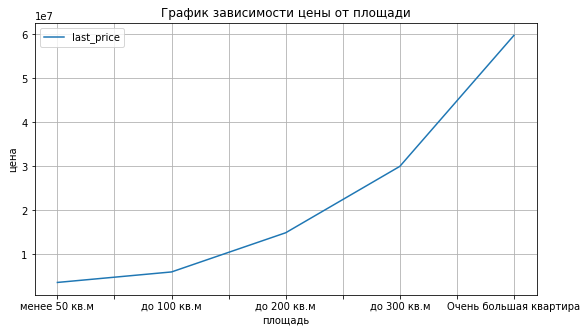

In [18]:
def total_group(total):
    if total <= 50:
        return 'менее 50 кв.м'
    if total <= 100:
        return 'до 100 кв.м'
    if total <= 200:
        return 'до 200 кв.м'
    if total <= 300:
        return 'до 300 кв.м'
    return 'Очень большая квартира'
data['total_group'] = data['total_area'].apply(total_group)
area_table_group = data.pivot_table(index='total_group', values='last_price', aggfunc='median').sort_values(by='last_price')
area_table_group.plot(figsize=(9,5),grid=True, label='Зависимость цены от площади', legend=True, title='График зависимости цены от площади',xlabel='площадь',ylabel='цена')

 Чем меньше площадь тем меньше цена, чем больше площадь тем больше цена.    

<h5> Зависимость цены от жилой площади <a class="tocSkip"></h5

<AxesSubplot:title={'center':'График зависимости цены от жилой площади'}, xlabel=' жилая площадь', ylabel='цена'>

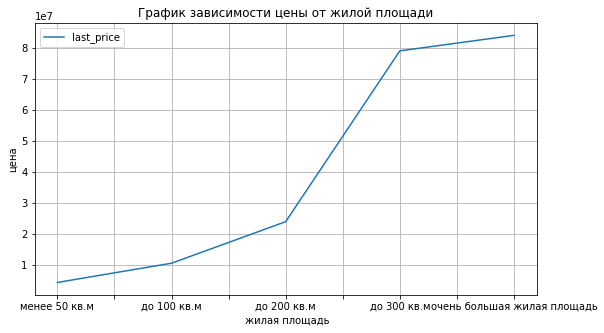

In [19]:
def living_group(living):
    if living <= 50:
        return 'менее 50 кв.м'
    if living <= 100:
        return 'до 100 кв.м'
    if living <= 200:
        return 'до 200 кв.м'
    if living <= 300:
        return 'до 300 кв.м'
    return 'очень большая жилая площадь'
data['living_group'] = data['living_area'].apply(living_group)
living_area_table_group = data.pivot_table(index='living_group', values='last_price', aggfunc='median').sort_values(by='last_price')
living_area_table_group.plot(figsize=(9,5),grid=True,label='Зависимость цены от жилой площади', legend=True, title='График зависимости цены от жилой площади',xlabel=' жилая площадь',ylabel='цена')


Чем больше жилая площадь тем выше цена, однако, на нее может влиять и расположение квартиры.

<h5> Зависимость цены от площади кухни <a class="tocSkip"></h5

<AxesSubplot:title={'center':'График зависимости цены от площади кухни'}, xlabel='площадь кухни', ylabel='цена'>

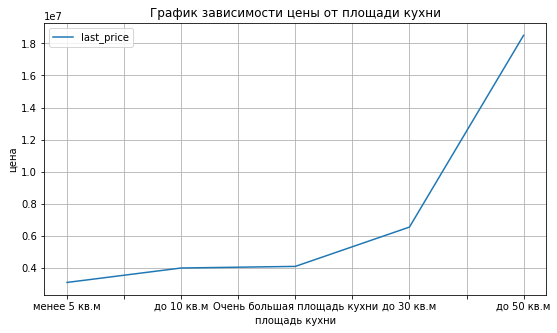

In [20]:
def kitchen_group(kitchen):
    if kitchen <= 5:
        return 'менее 5 кв.м'
    if kitchen <= 10:
        return 'до 10 кв.м'
    if kitchen <= 30:
        return 'до 30 кв.м'
    if kitchen <= 50:
        return 'до 50 кв.м'
    return 'Очень большая площадь кухни'
data['kitchen_group'] = data['kitchen_area'].apply(kitchen_group)
living_area_table_group = data.pivot_table(index='kitchen_group', values='last_price', aggfunc='median').sort_values(by='last_price')
living_area_table_group.plot(figsize=(9,5),grid=True,label='Зависимость цены от площади кухни', legend=True, title='График зависимости цены от площади кухни',xlabel='площадь кухни',ylabel='цена')



Существует некоторая зависимость цены от площади кухни, но я думаю это не основопологающий фактор зависимости цен,ведь все упираеться в площадь, а кухню можно и переделать)

<h5> Зависимость цены от количества комнат <a class="tocSkip"></h5

<AxesSubplot:title={'center':'График зависимости цены от комнат'}, xlabel='комнаты', ylabel='цена'>

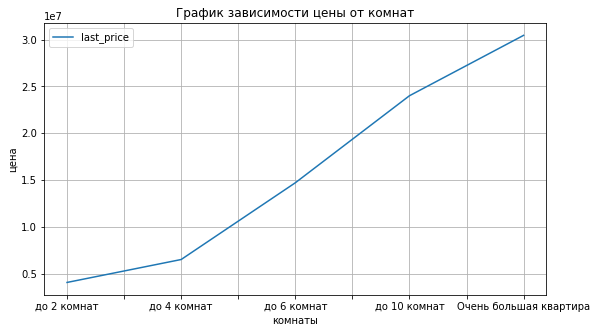

In [21]:
def rooms_group(rooms):
    if rooms <= 2:
        return 'до 2 комнат'
    if rooms <= 4:
        return 'до 4 комнат'
    if rooms <= 6:
        return 'до 6 комнат'
    if rooms <= 10:
        return 'до 10 комнат'
    return 'Очень большая квартира'
data['rooms_group'] = data['rooms'].apply(rooms_group)
living_area_table_group = data.pivot_table(index='rooms_group', values='last_price', aggfunc='median').sort_values(by='last_price')
living_area_table_group.plot(figsize=(9,5),grid=True,label='Зависимость цены от комнат', legend=True, title='График зависимости цены от комнат',xlabel='комнаты',ylabel='цена')



 Как видим чем больше комнат(тем больше площадь) тем выше цена.

<h5> Зависимость цены от этажа<a class="tocSkip"></h5

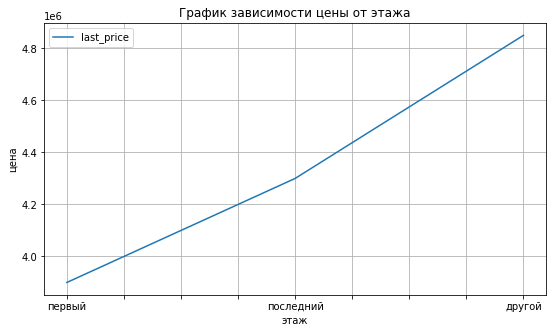

In [22]:
floor_category_table_group = data.pivot_table(index='floor_category', values='last_price', aggfunc='median').sort_values(by='last_price')
floor_category_table_group.plot(figsize=(9,5),grid=True,label='Зависимость цены от этажа', legend=True, title='График зависимости цены от этажа',xlabel='этаж',ylabel='цена')
plt.show()




Первый этаж цениться меньше всего, другие этажи самые ценные, последний расположился в середине.    

<h5> Зависимость цены от дата размещения (день недели, месяц, год)<a class="tocSkip"></h5

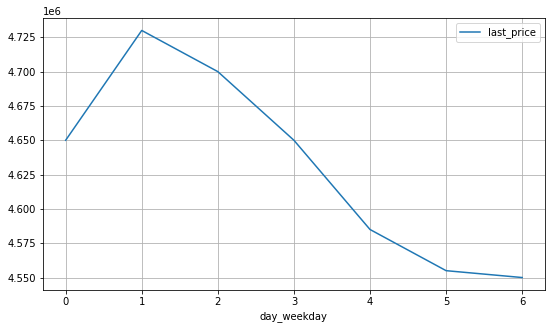

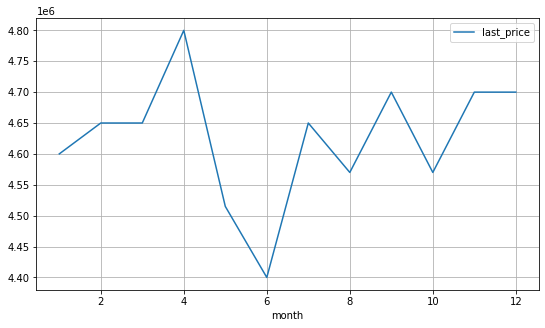

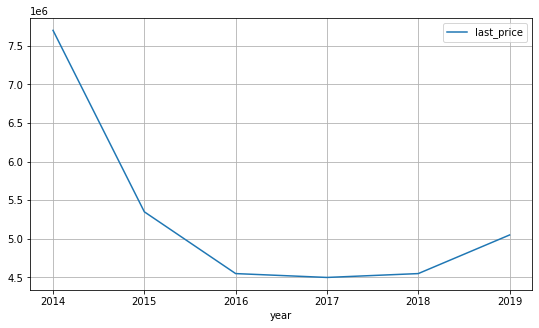

In [23]:
day_table_group = data.pivot_table(index='day_weekday', values='last_price', aggfunc='median').sort_values(by='last_price')
day_table_group.sort_values(by='day_weekday').plot(figsize=(9,5),grid=True)
month_table_group = data.pivot_table(index='month', values='last_price', aggfunc='median').sort_values(by='last_price')
month_table_group.sort_values(by='month').plot(figsize=(9,5),grid=True)
plt.show()
year_table_group = data.pivot_table(index='year', values='last_price', aggfunc='median').sort_values(by='last_price')
year_table_group.sort_values(by='year').plot(figsize=(9,5),grid=True)
plt.show()

Из года в год ситуация меняеться, можно предположить что это связано с экономической, политической и т.д ситуациями.

<h5> Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений<a class="tocSkip"></h5

In [24]:
ten_locality_name = data['locality_name'].value_counts().head(10)
display(ten_locality_name)
top_ten_loc_name = data[data['locality_name'].isin(ten_locality_name.index)]
top_ten_pivot_table = top_ten_loc_name.pivot_table(index='locality_name', values='last_price', aggfunc='median')
print('Средняя стоимость кв.м в 10 н.п с наибольшим числом обьявлений', top_ten_pivot_table)
print("")
print('Город с самой высокой стоимость кв.м', top_ten_pivot_table.query('last_price == last_price.max()'))
print("")
print('Город с самой низкой ценой кв.м', top_ten_pivot_table.query('last_price == last_price.min()'))


санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

Средняя стоимость кв.м в 10 н.п с наибольшим числом обьявлений                    last_price
locality_name                
всеволожск          3450000.0
выборг              2897000.0
гатчина             3100000.0
деревня кудрово     3790000.0
колпино             3600000.0
поселок мурино      3400000.0
поселок парголово   4100000.0
поселок шушары      3950000.0
пушкин              5180000.0
санкт-петербург     5500000.0

Город с самой высокой стоимость кв.м                  last_price
locality_name              
санкт-петербург   5500000.0

Город с самой низкой ценой кв.м                last_price
locality_name            
выборг          2897000.0



 Цена меняется в зависимости от расположения обьекта.Чем больше,красивее, премиальнее, тем выше цена.

<h5> Квартиры в Санкт-Петербурге и их средняя стоимость на разном удалении от центра<a class="tocSkip"></h5

                      last_price
city_centers_nearest            
0                     11750000.0
1                     10835000.0
2                      9500000.0
3                      8500000.0
4                      9900000.0
5                      8920262.0
6                      8005000.0
7                      7500000.0
8                      6500000.0
9                      5000000.0
10                     5000000.0
11                     5000000.0
12                     5000000.0
13                     5200000.0
14                     4900000.0
15                     4800000.0
16                     4650000.0
17                     4450000.0
18                     4410000.0
19                     4499500.0
20                     6045000.0
21                     4700000.0
22                     5000000.0
23                     3940000.0
24                     3480000.0
25                     3420000.0
26                     3975000.0
27                     8300000.0
28        

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


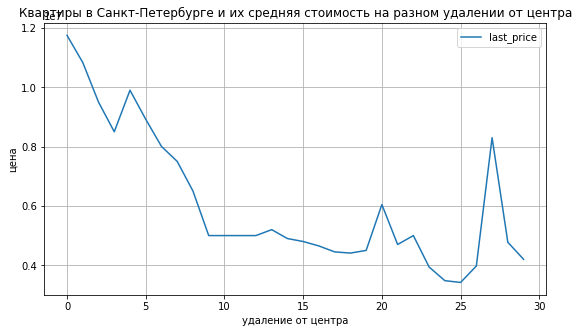

In [25]:
saint_piter_price = data.query('locality_name == "санкт-петербург"')

saint_piter_price.loc[:,'city_centers_nearest'] = saint_piter_price['city_centers_nearest'].dropna()
saint_piter_price.loc[:,'city_centers_nearest'] = saint_piter_price['city_centers_nearest'] / 1000
saint_piter_price.loc[:,'city_centers_nearest'] = saint_piter_price['city_centers_nearest'].astype('Int64')

piter_center_price = saint_piter_price.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='median').sort_values(by='city_centers_nearest',ascending=True)
print(piter_center_price)
piter_center_price.plot(figsize=(9,5),grid=True,label='Квартиры в Санкт-Петербурге и их средняя стоимость на разном удалении от центра', legend=True, title='Квартиры в Санкт-Петербурге и их средняя стоимость на разном удалении от центра',xlabel='удаление от центра',ylabel='цена')
plt.show()



Как мы видим, чем ближе к центру тем выше цена, чем дальше от центра тем ниже цена, но есть зависимость от других факторов, например от площади обьекта.    
 

Посчитал данные по каждому километру,высокие цены держаться до 2,3км-9225000, это говорит о том что чем ближе к центру тем лучше качество жизни,ближе магазины, развлекательные центры и т.д ,сооответствено и цены на жилье выше.
       

 Цены держат высокий уровень от центра(11750000) до 2 км(9500000), что вполне логично, развлекательные центры и все прочее в шаговой доступности, ну и премиальный район.Чем далее от центра тем ниже цены.    

### Общий вывод


Исходя из результатов можно сделать вывод, что существует множество факторов влияющих на цену квартиры, по моему мнению определяющие факторы это конечно жилая площадь и общая площадь, но нельзя исключать и другие факторы, такие как расположение обьекта(в каком городе находиться, если есть центр, то растояние от него) и т.д.Например в Санкт-Петербурге самая высокая цена за кв.м (5500000), а в Выборге самая низкая(2897000).Так же есть зависимость от года размещения,например в 2014 были самые высокие цены, а с 2016-2018 был спад, далее ситуация опять начала меняться и цены пошли вверх, это говорит о том что существуют еще и внешние факторы такие как политическая,мировая,экономическая обстановки.
